#**CIS 419/519**

## PCA and K-means worksheet 

In this notebook, two examples for PCA and K-means are provided respectively. 

# Section 1: PCA

This is a basic tutorial for implementing Principal Component Analysis (PCA) with the scikit-learn library with Python. This tutorial uses material from: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

---



First, we import a few required libraries that have been installed within Colab.

In [ ]:
# Numpy is a library that does vector and matrix computations efficiently.
# This command below import Numpy into the workspace
import numpy as np

# Matplotlib is a library using for plotting, which is modelled after the plotting functions in MATLAB.
# This command below import Matplotlib into the workspace
import matplotlib.pyplot as plt

## 1. Introducing Principal Component Analysis

Principal component analysis is a fast and flexible method for dimensionality reduction in data. Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 200 random-generated points (fictitious dataset):

In [ ]:
# Creating a random dataset (X)
rng   = np.random.RandomState(1)
X     = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# Plotting the dataset in 2D
plt.scatter(X[:, 0], X[:, 1])
plt.grid('on')
plt.axis('equal')

---

**This is the main code to implement PCA. It only involves three lines of code!**

In [ ]:
from sklearn.decomposition import PCA

# Creating an PCA object (pca) and extracting the two most important components/features (n_components=2)
pca = PCA(n_components=2)
pca.fit(X)

The PCA gives some quantities from the data, most importantly the "components" and "explained variance":

`pca.components_` are the principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by `pca.explained_variance_`.

In [ ]:
print(pca.components_)

`pca.explained_variance_` is the amount of variance explained by each of the selected components.

Equal to n_components largest eigenvalues of the covariance matrix of X.

In [ ]:
print(pca.explained_variance_)

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Plotting of explained_variance_ and components_
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.grid('on')
plt.axis('equal')

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data. More precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

---

## 2. PCA as a tool for dimensionality reduction

An important function of PCA is to reduce the dimensionality of your dataset. Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data.

Here is an example of using PCA as a dimensionality reduction transform:

In [ ]:
# We create the same PCA object (pca) but now we extract only one component (n_components=1)
pca = PCA(n_components=1)
pca.fit(X)

# We then project the original dataset (X) onto this single component/dimension to get X_pca
X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

---

## 3. PCA as a visualization tool: Example with the Hand-written Digits dataset

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to a dataset of hand-written digits (0 to 9).

We start by loading the data:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

This dataset consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [14]:
from sklearn.decomposition import PCA

# TODO: Make PCA object and project from 64 to 2 dimensions
pca   = PCA(n_components=2)
X_pca = pca.fit_transform(digits.data)

# This printout below confirms that the projection contains only two dimensions
print(digits.data.shape)
print(X_pca.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

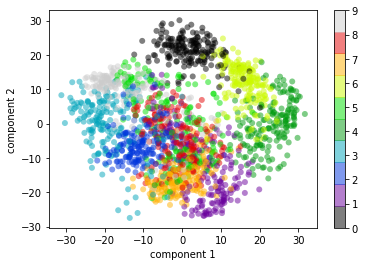

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**Interpretation of the color map**: The full data is a 64-dimensional point cloud, and these colored points plotted above are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions.

# Section 2: K-means clustering

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as *k-means clustering*, which is implemented in ``sklearn.cluster.KMeans``.

We begin with the standard imports:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Introducing k-Means

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.
Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.
First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


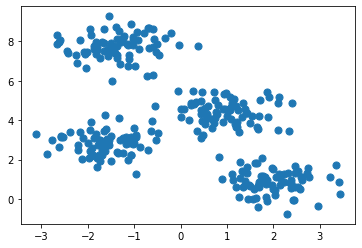

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [5]:
from sklearn.cluster import KMeans

# TODO: Make KMeans object and fit to the data. Finally, produce the precicted clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

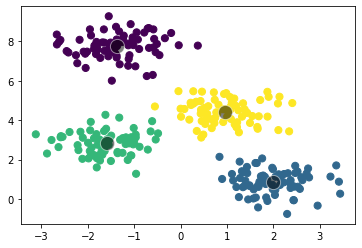

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# TODO: get the determined cluster centroid locations
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, edgecolor='white');

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly. Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to k-means involves an intuitive iterative approach known as expectation–maximization.

## k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
For the particular initialization shown here, the clusters converge in just three iterations.
For an interactive version of this figure, refer to the code in [the Appendix](06.00-Figure-Code.ipynb#Interactive-K-Means).

The *k*-Means algorithm is simple enough that we can write it in a few lines of code.
The following is a very basic implementation:

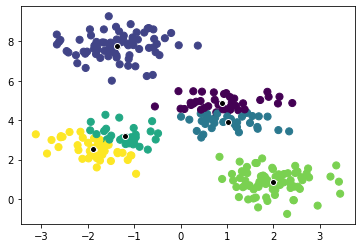

In [9]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 6)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c="black", edgecolors="white")

Most well-tested implementations will do a bit more than this under the hood, but the preceding function gives the gist of the expectation–maximization approach.